# Changing Topic to: CO2 Emissions over years and its impact on life/climates and showing current trends

## Project Title: Visualizing the Impact of CO2 Emissions on Communities and Climates

### Description:

#### Overview: 
This project focuses on visualizing global CO2 emissions data to provide insights into trends, patterns, and the impact of human activities on climate change. Through interactive data visualization techniques, we aim to offer a comprehensive view of CO2 emissions over time, with a focus on their consequences for communities and the environment.

#### Statement: 
CO2 emissions play a pivotal role in shaping our world, impacting not only climate but also the communities and ecosystems within it. This project aims to explore and visualize the influence of CO2 emissions on communities and climates.

#### Solution:
Create a data visualization project that effectively communicates the relationship between CO2 emissions, climate change, and their effects on communities. We'll highlight current trends and emphasize the importance of sustainable practices and climate action.

### File Path:

datasets/annual-co-emissions-by-region.csv

datasets/annual-co2-emissions-per-country.csv

datasets/co-emissions-per-capita.csv

datasets/global-co2-fossil-plus-land-use.csv

In [5]:
# pip install basemap

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl 
import matplotlib.pyplot as plt # using this to plot
import plotly.express as px
# import basemap

import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Set the relative path to the dataset folder
dataset_path = os.getcwd() + "/datasets"

# Display the contents of the dataset folder
print(os.listdir(dataset_path))

Current Working Directory: d:\CECS450-project
['annual-co-emissions-by-region.csv', 'annual-co2-emissions-per-country.csv', 'co-emissions-per-capita.csv', 'cumulative-co-emissions.csv', 'cumulative-co2-emissions-region.csv', 'global-co2-fossil-plus-land-use.csv']


# **Annual** CO2 emissions

The emissions data presented here is based on the country where CO2 is produced (i.e., production-based CO2), rather than where the goods and services generating emissions are ultimately consumed. We also consider the disparity between each country's production and consumption-based emissions (trade-adjusted emissions).

Asia stands out as the largest emitter, accounting for a significant 53% of global emissions. Given that it's home to 60% of the world's population, per capita emissions in Asia are slightly below the global average.

China, by a substantial margin, emerges as the leading emitter in Asia and the world, contributing nearly 10 billion tonnes of CO2 annually, which is more than one-quarter of global emissions.

North America, largely represented by the USA, comes in as the second-largest regional emitter, responsible for 18% of global emissions. Europe follows closely behind, contributing 17% of global emissions. In our analysis, we group the 28 countries of the European Union, as they often work together to set collective targets. For a detailed breakdown of emissions by individual EU countries, you can explore the interactive maps that follow.

In contrast, Africa and South America are relatively minor emitters, each accounting for 3-4% of global emissions. Their emissions are comparable in size to those produced by international aviation and shipping. It's worth noting that aviation and shipping emissions are not included in national or regional emissions data due to ongoing debates over the allocation of emissions that cross international borders. Questions like whether they belong to the departure country or the country of origin and how connecting flights are accounted for contribute to the complexity of international aviation and shipping agreements, which are discussed in detail by Carbon Brief."

In [60]:
# Update the file name accordingly
file_name = 'annual-co2-emissions-per-country.csv'

# Load the dataset
file_path = os.path.join(dataset_path, file_name)

# read in the data
annual_co2_per_country = pd.read_csv(file_path, header=0)
annual_co2_per_country.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


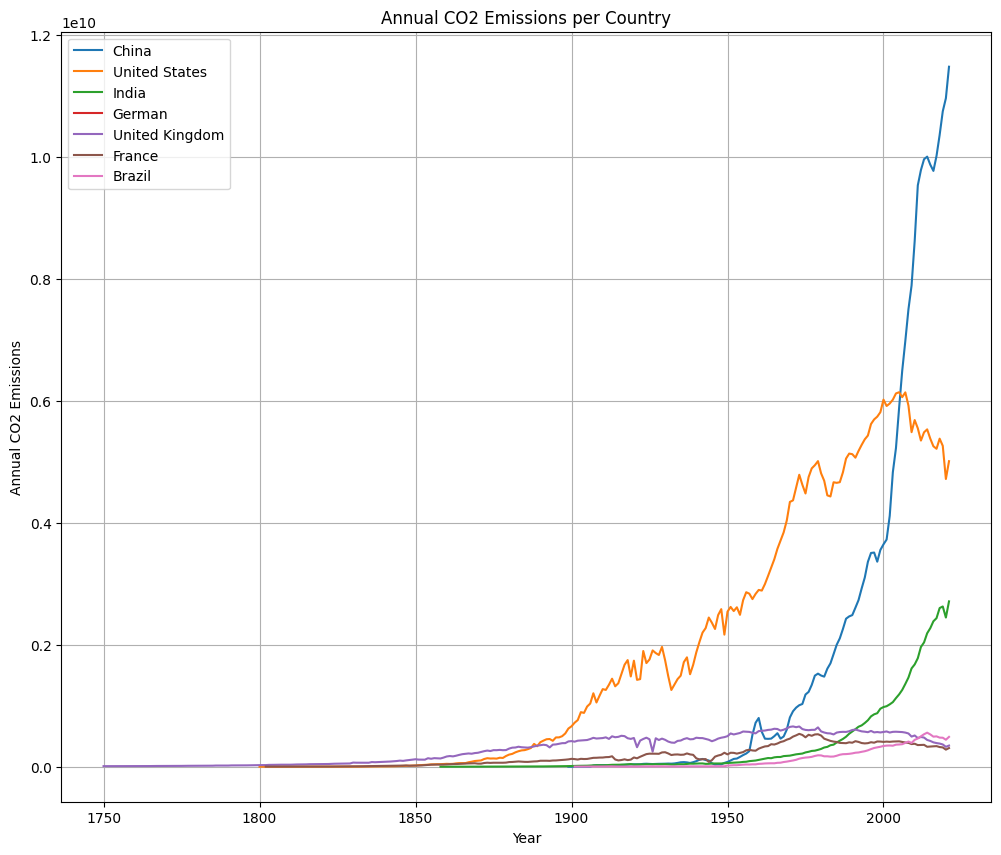

In [61]:
annual_co2_per_country = pd.DataFrame(annual_co2_per_country)

# choose a few specific countries
countries = ['China', 'United States', 'India', 'German', 'United Kingdom', 'France', 'Brazil']

# create a new dataframe with only the chosen countries
countries_data = annual_co2_per_country[annual_co2_per_country['Entity'].isin(countries)]

plt.figure(figsize=(12, 10)) # Adjust the values as needed

# group the data by country
for country in countries:
    country_data = countries_data[countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Annual CO₂ emissions'], label=country)

plt.title('Annual CO2 Emissions per Country')
plt.xlabel('Year')
plt.ylabel('Annual CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()


#### Emission Amounts After 1990 by Country

In [62]:
annual_co2_per_country.sort_values(by="Annual CO₂ emissions") # sort value annual CO2 emissions

,Entity,Code,Year,Annual CO₂ emissions
9371,Europe (excl. EU-28),NaN,1823,0.000000e+00
25332,Singapore,SGP,1806,0.000000e+00
25333,Singapore,SGP,1807,0.000000e+00
25334,Singapore,SGP,1808,0.000000e+00
25335,Singapore,SGP,1809,0.000000e+00
...,...,...,...,...
31078,World,OWID_WRL,2014,3.557754e+10
31081,World,OWID_WRL,2017,3.609674e+10
31082,World,OWID_WRL,2018,3.682651e+10
31083,World,OWID_WRL,2019,3.708256e+10


In order to have a cleaner chart, I deleted rows that includes "World".

In [63]:
annual_co2_top = annual_co2_per_country[(annual_co2_per_country["Annual CO₂ emissions"] > 600000000) & (annual_co2_per_country["Year"]>1990)] # get value annual Co2 > 600000000 and after 1990 by Country
drops = annual_co2_top[annual_co2_top["Entity"] == "World"].index # get value country is "World" in table 
df_top = annual_co2_top.drop(drops) # delete the country is world in the table
fig = px.line(df_top, x='Year', y='Annual CO₂ emissions', color='Entity', title="Emission Amounts After 1990 by Country") # draw graph
fig.show()

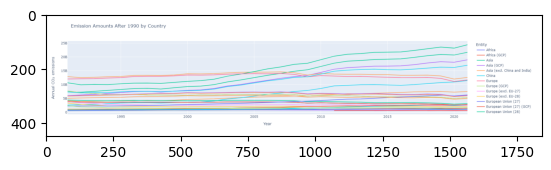

<Figure size 1800x1000 with 0 Axes>

In [64]:
import matplotlib.image as mpimg

img = mpimg.imread('images/emission-amount-after-1990.png')
imgplot = plt.imshow(img)
plt.figure(figsize=(18, 10)) 
plt.show()

According to chart above, regions with high GDP has decreased CO2 emissions after 2005.

However, China has increased CO2 emission, and this value is much higher than developed countries.

# **Total** Co2 Emissions by US

In [65]:
import seaborn as sns

data_emissions = annual_co2_per_country # copy data
data_emissions.info()
data_emissions.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                31349 non-null  object 
 1   Code                  24974 non-null  object 
 2   Year                  31349 non-null  int64  
 3   Annual CO₂ emissions  31349 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 979.8+ KB


Entity                     0
Code                    6375
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [66]:
data_emissions.drop('Code', axis = 1, inplace=True) # delete column "Code" in table
data_emissions.rename(columns={'Annual CO₂ emissions':'CO2'}, inplace=True) # remane column Annual CO₂ emissions to CO2

In [67]:
def visualise_country(country):
    # Creating a seperate dataframe
    data_emissions_vis = data_emissions[data_emissions['Entity'] == country]
    tot_yr = data_emissions_vis.Year.max() - data_emissions_vis.Year.min()
    tot_em = data_emissions_vis.CO2.sum()
    print(f"Total Co2 Emissions by {country} in {tot_yr} years: {'{:.2f}'.format(tot_em)} tonnes")
    
    # Plot
    fig = sns.lineplot(data=data_emissions_vis, x="Year", y='CO2')
    plt.title('Co2 Emissions by ' + country + ' in '+str(tot_yr)+' years \n', fontsize=20)
    plt.ylabel('Co2 Emissions')

Total Co2 Emissions by United States in 221 years: 421906856549.98 tonnes


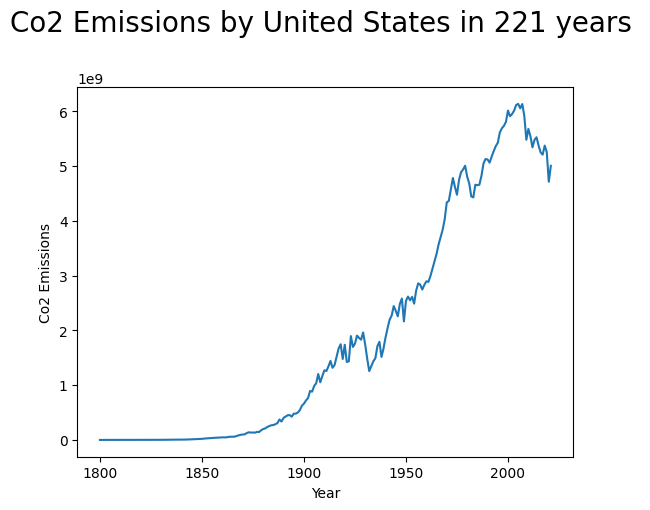

In [68]:
visualise_country('United States')

# **Global** CO2 emissions from fossil fuels and land use change

In this chart, we observe the trajectory of global emissions from the mid-18th century to the present day.

It is evident that while emissions stemming from fossil fuels have shown a consistent upward trend, emissions resulting from land use change have exhibited a minor decline in recent years. Consequently, the net effect has been a relatively stable total emissions trend over the past decade.

In [43]:
# Update the file name accordingly
file_name = 'global-co2-fossil-plus-land-use.csv'

# Load the dataset
file_path = os.path.join(dataset_path, file_name)

# read in the data
global_co2_fossil_land = pd.read_csv(file_path, header=0)
global_co2_fossil_land.head()

,Entity,Code,Year,Annual CO₂ emissions,Annual CO₂ emissions including land-use change,Annual CO₂ emissions from land-use change
0,Afghanistan,AFG,1850,NaN,NaN,2931200.0
1,Afghanistan,AFG,1851,NaN,NaN,2967840.0
2,Afghanistan,AFG,1852,NaN,NaN,2967840.0
3,Afghanistan,AFG,1853,NaN,NaN,3004480.0
4,Afghanistan,AFG,1854,NaN,NaN,3004480.0


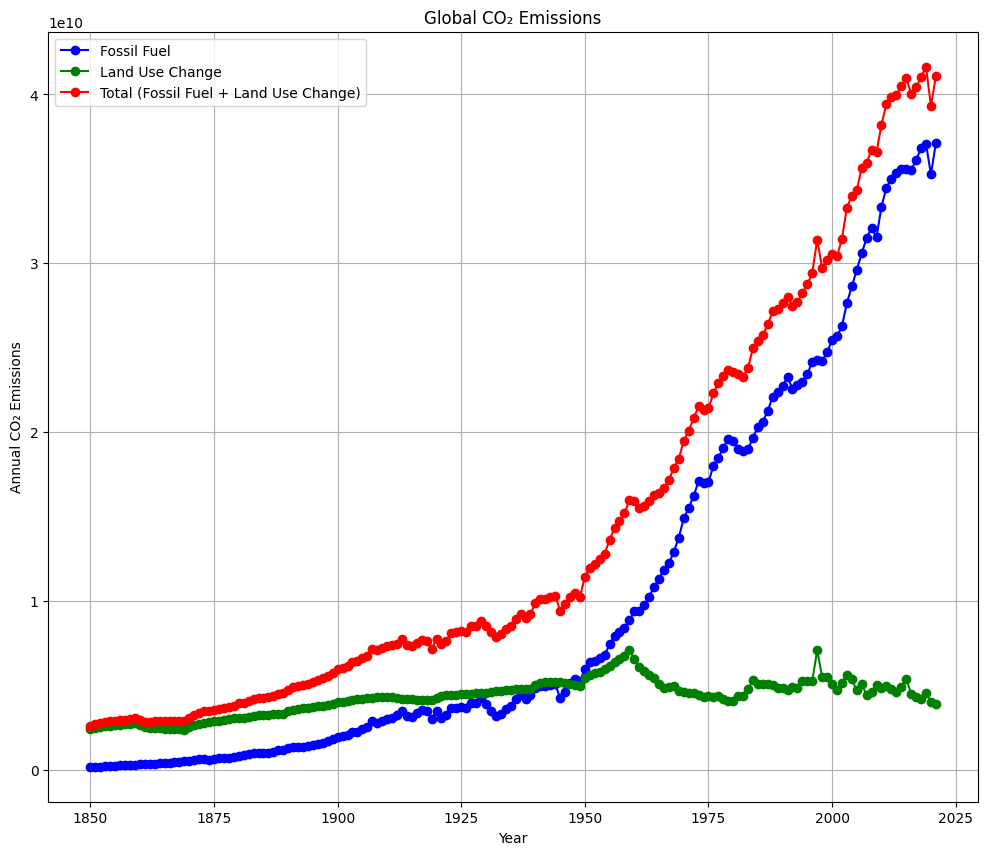

In [44]:
# Create a DataFrame from the data
global_co2_fossil_land = pd.DataFrame(global_co2_fossil_land)
world_data = global_co2_fossil_land[global_co2_fossil_land['Entity']=='World']

# Extract the Year and Annual CO₂ emissions from land-use change values
years = world_data['Year']
emissions_fossil_fuel = world_data['Annual CO₂ emissions including land-use change'] - world_data['Annual CO₂ emissions from land-use change']
emissions_land_use_change = world_data['Annual CO₂ emissions from land-use change']
emissions_total = world_data['Annual CO₂ emissions including land-use change']

plt.figure(figsize=(12, 10))  # Adjust the values as needed

# Create the line graph for global CO₂ emissions
plt.plot(years, emissions_fossil_fuel, marker='o', linestyle='-', color='b', label='Fossil Fuel')
plt.plot(years, emissions_land_use_change, marker='o', linestyle='-', color='g', label='Land Use Change')
plt.plot(years, emissions_total, marker='o', linestyle='-', color='r', label='Total (Fossil Fuel + Land Use Change)')
plt.title('Global CO₂ Emissions')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions')
plt.grid(True)
plt.legend()

plt.show()

# Fossil Fuel and land use change in US

In [32]:
cols = [
    'Annual CO₂ emissions','Annual CO₂ emissions including land-use change','Annual CO₂ emissions from land-use change'
]
highlight = 'Annual CO₂ emissions including land-use change'

us_data = global_co2_fossil_land[global_co2_fossil_land['Entity']=='United States']
us_data.set_index('Year', inplace=True)

xmax = us_data.index.max()
xmin = xmax - 100

title = 'Fossil Fuel and Land Use Change in US from {} to {}'.format(xmin, xmax)

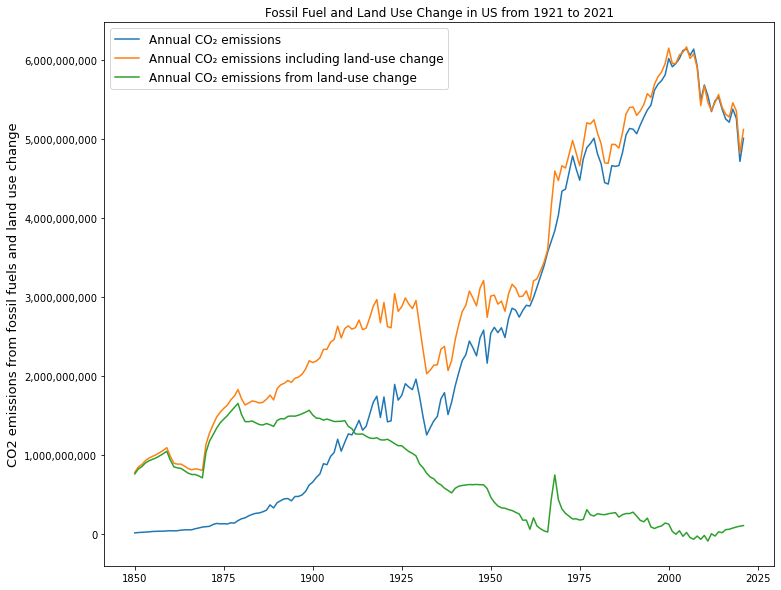

In [33]:
ax = us_data[cols].plot(figsize=(12, 10), title=title)

ax.yaxis.set_major_formatter(
    mpl.ticker.FuncFormatter(lambda val, p: format(int(val), ',')))

ax.set_ylabel('CO2 emissions from fossil fuels and land use change', fontsize=13)
ax.set_xlabel('', visible=False)
ax.legend(loc=2, prop={'size': 12})

### to do some annotate
# plt.annotate(
#     'Dot-com bust', 
#     xy=(2000, df_us.ix[2000][highlight]),
#     xytext=(0, 5),
#     textcoords='offset points',
#     ha='center',
#     va='bottom',
#     size=11)

# plt.annotate(
#     'Financial crisis', 
#     xy=(2007, df_us.ix[2007][highlight]),
#     xytext=(0, 5),
#     textcoords='offset points',
#     ha='center',
#     va='bottom',
#     size=11)

### to save the graph to file as png
# plt.savefig('img/income-share-top-us-{}-{}.png'.format(xmin, xmax), bbox_inches='tight')

In [34]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming your CO2 data is in a DataFrame called 'co2_data' with columns 'Country' and 'CO2_Density'
# Merge CO2 data with world map data
merged_data = world.merge(global_co2_fossil_land, how='left', left_on='name', right_on='country')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 6))  # Adjust the figure size as needed
ax.set_title('CO2 Emissions Density Map')
merged_data.plot(column='CO2_Density', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Optional: Add labels, legend, or any other customizations
plt.show()


C:\Temp/ipykernel_19664/370891216.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


KeyError: 'country'